In [1]:
#Implementation of backPropogation algorithm

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat

In [2]:
#Backpropogation algorithm is used to learn the parameters of NN just like gradient descent in 
#linear and logistic regression

data = loadmat(os.path.join("C:/Users/dynam/Desktop/Coursera AndrewNg/machine-learning-ex4/machine-learning-ex4/ex4","ex4data1.mat"))
X, y = data['X'], data['y'].ravel()
y[y == 10] = 0
m = y.size

In [3]:
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

weights = loadmat(os.path.join("C:/Users/dynam/Desktop/Coursera AndrewNg/machine-learning-ex4/machine-learning-ex4/ex4","ex4weights.mat"))
Theta1, Theta2 = weights['Theta1'], weights['Theta2']
Theta2 = np.roll(Theta2, 1, axis=0)
#since the adv optimization algorithm takes in only vectors as input,we unroll theta into vectors
nn_params = np.concatenate([Theta1.ravel(),Theta2.ravel()])

In [4]:
print("Theta 1.shape {}".format(Theta1.shape))
print("Theta 2.shape {}".format(Theta2.shape))
print("nn_params.shape {} ".format(nn_params.shape))

Theta 1.shape (25, 401)
Theta 2.shape (10, 26)
nn_params.shape (10285,) 


In [5]:
a = np.array([1,2,3])
b = ([3,4,5])
print("Scalar matrix multiplication used in finding delta,gradientSigmoid {}".format(a*b))

Scalar matrix multiplication used in finding delta,gradientSigmoid [ 3  8 15]


In [6]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [7]:
def sigmoidGradient(z):
    #computes the gradient of the sigmoid function evaluated at z
    #works regardless of weather z is a vector,matrix
    #in particular if z is avector or a mtrix,then t should return gradient for each element
    
    g = np.zeros(z.shape)
    g = sigmoid(z)*(1-sigmoid(z))
    return g

In [8]:
#originally y is a vector containing 0 to 09 but we need to one hot encode it to values containing 0 or 1
#0 refers to negetive class where as 1 refers to positiove class
#we should calculate the hypothesis for every example of training set and sum the cost using forward prop

#cost function and grad for 2 layer NN which performs classifications
def nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_ = 0.0):
    #nn_params : paramete for th nn unrolled into a vector 
    #X : (m X input_layer_size)
    #y : (m,)
    #grad : unrolled vector of the partial derivatives
    #Theta1 : (25,401)
    #Theta2 : (10,25)
    
    #unroll 1D nn_params back into Theta1,Theta2
    Theta1 = np.reshape(nn_params[0:hidden_layer_size*(input_layer_size + 1)],(hidden_layer_size,(input_layer_size+1)))
    Theta2 = np.reshape(nn_params[hidden_layer_size*(input_layer_size + 1):],(num_labels,(hidden_layer_size + 1)))
    m = y.size
    
    J = 0
    #derivative of cost function will have same dimension of Theta
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    #a1 is input layer.Hence concatenate 1 to X to accomodate the bias unit
    a1 = np.concatenate([np.ones((m,1)),X],axis = 1)
    a2 = sigmoid(a1.dot(Theta1.T))
    #concatenate the bias term
    a2 = np.concatenate([np.ones((a2.shape[0],1)),a2],axis = 1)
    
    a3 = sigmoid(a2.dot(Theta2.T))
    
    y_matrix = y.reshape(-1) #we use -1 when we dont know dimension and want np to figure it out
    #np.eye(num_label) generates a diagnol matrix with 10X10 dim
    #we use [y_matrix] to pick individual arrays from the diagnal matrix corresponding to values present in y_matrix
    y_matrix = np.eye(num_labels)[y_matrix]
    
    temp1 = Theta1
    temp2 = Theta2
    
    #add regularization term
    #Theta1[:,1:] and Theta2[:,1:] is done to prevent regularization of the columns with ones
    reg_term = (lambda_/(2*m))*(np.sum(np.square(temp1[:,1:])) + np.sum(np.square(temp2[:,1:])))
    J = (-1 / m) * np.sum((np.log(a3) * y_matrix) + np.log(1 - a3) * (1 - y_matrix)) + reg_term
    
    #Backpropogation
    #Theta1 (25,401) (#hidden units,#input units)
    #Theta2 (10,25) (#output units,#hidden layers)
    #a1 (5000,401) (#samples,#features or pixels)
    #we can calculate delta_3 by subtratcing prdictions from label
    #we use backprop to calculate delta_2 from delta_3 and so on...
    delta_3 = a3 - y_matrix #(5000,10)
    delta_2 = delta_3.dot(Theta2)[:, 1:] * sigmoidGradient(a1.dot(Theta1.T))
    
    dJBydTheta1 = delta_2.T.dot(a1)
    dJBydTheta2 = delta_3.T.dot(a2)
    
    #add regularization term except for bias unit
    
    #print(Theta1[:,1:].shape)
    D1 = (1/m)*dJBydTheta1 
    #print(D1[:,1:].shape)
    D1[:,1:] = D1[:,1:] + (lambda_/m)*Theta1[:,1:]
    #nit adding reg term for bias unit   
    D2 = (1/m)*dJBydTheta2
    D2[:,1:] = D2[:,1:] + (lambda_/m)*Theta2[:,1:]
    
    grad = np.concatenate([D1.ravel(),D2.ravel()])
    return J,grad

In [9]:
lambda_ = 0
J,_ = nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_)
print("Cost at parameters given with lambda = 0 is {:.6f} ".format(J))

Cost at parameters given with lambda = 0 is 0.287629 


In [10]:
#cost function with lambda_ = 1
lambda_ = 1
J,_ = nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_)
print("Cost at parameters given with lambda = 1 is {:.6f} ".format(J))

Cost at parameters given with lambda = 1 is 0.383770 


In [11]:
#random initialization
#if we dont initialize the parameters randomly,then the error propogated through the network will be same
#the weight changes depend on the error signal,hence all the weights of the model will be same
#hence we initialize the paramaters randomly in the range[-epsilon,epsilon] where Epsilon = 0.12.

def randInitializeWeights(L_in,L_out,epsilon_init = 0.12):
    #L_in : #input conections
    #L_out : #output units
    #epsilon_init : range for random values of epsilon
    #w : (L_out,L_in + 1) matrix where the first column handles the # bias units
    
    W = np.zeros((L_out,L_in+1))
    #np.rndom.range(shape_arr) generates a matrix of shape given with random values between [0,1)
    W = np.random.rand(L_out,L_in+1)*2*epsilon_init - epsilon_init
    return W

In [12]:
print("Initializing Neural Network Parametrs Theta1 and Theta2.....")
initial_Theta1 = randInitializeWeights(input_layer_size,hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size,num_labels)

#unroll the parameters because the neural takes in only linear inputs
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

Initializing Neural Network Parametrs Theta1 and Theta2.....


In [13]:
#Gradient checking

#compute numerical gradient
def computerNumericalGradient(J,theta,e = 1e-4): #taking e = 10^-4
    #J : function which will be used to estimate numerical gradient
    #theta : 1D unrolled parameter array.The numerical gradiet computed at those params
    #e : float value of epsilon
    
    #The foll. code return numgrad where numgrad[i] is the numerical approximation of the derivative of J wrt theta[i].   
    numgrad = np.zeros(theta.shape)
    #np.diag(v) extracts all diagonal elements of matrix v into a single vector
    perturb = np.diag(np.ones(theta.shape)*e) #here we extract a diagonal vector with e multiplied Eg: [e e e .. e]
    
    print("pertube " + str(perturb.shape))
    print("theta " + str(theta.shape))
    for i in range(theta.size):
        J_plus,_ = J(theta + perturb[:,i])
        J_minus,_ = J(theta - perturb[:,i])
        numgrad[i] = (J_plus - J_minus)/(2*e)
    return numgrad  

In [14]:
def debugInitializeWeights(fan_out, fan_in):
    W = np.sin(np.arange(1, 1 + (1+fan_in)*fan_out))/10.0
    W = W.reshape(fan_out, 1+fan_in, order='F')
    return W

In [15]:
#Function to create a mini NN to test both the num_grad and analytical grad so that its faster
def checkNNGradients(nnCostFunction,lambda_ = 0):
    '''
    creates a small nn to check the backpropogation radient.
    It will output the anylytical gradients produced by our back prop code and the numerically
    calculated gradients.These two results should be close in terms of 10^-9.
    
    '''
    
    '''
    nnCostFunction : a reference to cost function
    lambda_ : The regularization parameter
    
    '''
    
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5 #samples
    
    #generate random test data
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)
    
    #Generate X too
    X = debugInitializeWeights(m, input_layer_size - 1)
    y = np.arange(1,1+m)%num_labels
    #unroll the parameters to be passed to the nn into single vector
    nn_params = np.concatenate([Theta1.ravel(),Theta2.ravel()])
    
    #make short hand for the cost fucntion using lambdas
    costFun = lambda NN_params : nnCostFunction(NN_params,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_)
    #grad : gradient obtained analytically on the small neural network with debugging data set
    #numgrad : radient obtained  numerically
    cost,grad = costFun(nn_params)
    numgrad = computerNumericalGradient(costFun,nn_params)
    
    #visually examine the two gradient computation
    print("Left column is numerically calculated gradient and right column is analytically calculated gradient")
    print(np.stack([numgrad,grad],axis = 1))
    print("The above two columns should be very similar")
    
    #evaluate the norm difference
    diff = np.linalg.norm(numgrad - grad)/np.linalg.norm(numgrad + grad)
    
    print('If your backpropagation implementation is correct, then \n'
          'the relative difference will be small (less than 1e-9). \n'
          'Relative Difference: %g' % diff)

In [16]:
checkNNGradients(nnCostFunction)

pertube (38, 38)
theta (38,)
Left column is numerically calculated gradient and right column is analytically calculated gradient
[[-9.27825235e-03 -9.27825236e-03]
 [-3.04978709e-06 -3.04978914e-06]
 [-1.75060084e-04 -1.75060082e-04]
 [-9.62660640e-05 -9.62660620e-05]
 [ 8.89911959e-03  8.89911960e-03]
 [ 1.42869450e-05  1.42869443e-05]
 [ 2.33146358e-04  2.33146357e-04]
 [ 1.17982666e-04  1.17982666e-04]
 [-8.36010761e-03 -8.36010762e-03]
 [-2.59383093e-05 -2.59383100e-05]
 [-2.87468729e-04 -2.87468729e-04]
 [-1.37149709e-04 -1.37149706e-04]
 [ 7.62813550e-03  7.62813551e-03]
 [ 3.69883257e-05  3.69883234e-05]
 [ 3.35320351e-04  3.35320347e-04]
 [ 1.53247082e-04  1.53247082e-04]
 [-6.74798369e-03 -6.74798370e-03]
 [-4.68759764e-05 -4.68759769e-05]
 [-3.76215583e-04 -3.76215587e-04]
 [-1.66560294e-04 -1.66560294e-04]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.64090819e-01  1.64090819e-01]
 [ 1.64567932e-01  1.64567932e-01]
 [ 1.58339334e-01  1.58339334e-01]
 [ 1.51127527e-01  1.51127527e-

In [17]:
#check gradient obtained numerically and analytically for test nueural network
lambda_ = 3
checkNNGradients(nnCostFunction,lambda_)
#output the cost function value
debug_J,_ = nnCostFunction(nn_params, input_layer_size,
                          hidden_layer_size, num_labels, X, y, lambda_)
print('\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' % (lambda_, debug_J))
print('(for lambda = 3, this value should be about 0.576051)')

pertube (38, 38)
theta (38,)
Left column is numerically calculated gradient and right column is analytically calculated gradient
[[-9.27825235e-03 -9.27825236e-03]
 [-1.67679797e-02 -1.67679797e-02]
 [-6.01744725e-02 -6.01744725e-02]
 [-1.73704651e-02 -1.73704651e-02]
 [ 8.89911959e-03  8.89911960e-03]
 [ 3.94334829e-02  3.94334829e-02]
 [-3.19612287e-02 -3.19612287e-02]
 [-5.75658668e-02 -5.75658668e-02]
 [-8.36010761e-03 -8.36010762e-03]
 [ 5.93355565e-02  5.93355565e-02]
 [ 2.49225535e-02  2.49225535e-02]
 [-4.51963845e-02 -4.51963845e-02]
 [ 7.62813550e-03  7.62813551e-03]
 [ 2.47640974e-02  2.47640974e-02]
 [ 5.97717617e-02  5.97717617e-02]
 [ 9.14587966e-03  9.14587966e-03]
 [-6.74798369e-03 -6.74798370e-03]
 [-3.26881426e-02 -3.26881426e-02]
 [ 3.86410548e-02  3.86410548e-02]
 [ 5.46101547e-02  5.46101547e-02]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.18682669e-01  1.18682669e-01]
 [ 2.03987128e-01  2.03987128e-01]
 [ 1.25698067e-01  1.25698067e-01]
 [ 1.76337550e-01  1.76337550e-

In [18]:
#After implementing cost function and gradient computation we can now use scipy's optimze.minimize to learn a good set of parameters
#Till now we were using the provided parametrs from data set
#now lets learn own parametrs

options = {"maxiter" : 250}
lambda_ = 1

#creating shorthand for the function to be minimized
costFunction = lambda p : nnCostFunction(p,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_)

#use scipy.optimize/alternative to gradient descent to miimie the cost function
#we need to pass the address of the cost function to optimize.minimize
res = optimize.minimize(costFunction,initial_nn_params,jac = True,method = "TNC",options = options)

#get the solution of the optimization
nn_params = res.x #unrolled parameters
#obtain Theta1,Theta2
Theta1 = np.reshape(nn_params[:(hidden_layer_size*(input_layer_size + 1))],(hidden_layer_size,(input_layer_size + 1)))
Theta2 = np.reshape(nn_params[(hidden_layer_size*(input_layer_size+1)):],(num_labels,(hidden_layer_size + 1)))

In [19]:
def predict(Theta1,Theta2,X):
    '''
    predict the label of an input given a trained NN
    Theta1 (25,400)
    Theta2 (10,25)
    X (5000,400)
    '''
    
    m = X.shape[0] #samples
    num_labels = Theta2.shape[0]
    
    h1 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))
    h2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), h1], axis=1), Theta2.T))
    
    #choosing the index value with highest probability output for each example
    p = np.argmax(h2,axis = 1)
    return p

In [20]:
pred = predict(Theta1,Theta2,X)
print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))

Training Set Accuracy: 99.100000


In [21]:
from matplotlib import pyplot

def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    print("X shape {}".format(X.shape))
    print("X ndim {}".format(X.ndim))
    
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    #suppose the shape of input is m,n where m is #samples and n is #features ie 400,
    #then the image is of the form sqrt(n)*sqrt(n)
    
    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width
    
    print("Example width {}".format(example_width))
    print("Example height {}".format(example_height))

    # Compute number of items to display
    #Ex: if the input has shape (m,n) which is (25,400),then the number of images would be 5*5 to display 
    #with equal number of images in rows and columns
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))
    
    print("display_rows {}".format(display_rows))
    print("display_cols {}".format(display_cols))
    print("figsize {}".format(figsize))
    
    #pyplot.subplots(nRows,nColumns,sizeOfEachImg)
    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                      cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

X shape (25, 400)
X ndim 2
Example width 20
Example height 20.0
display_rows 5
display_cols 5
figsize (10, 10)


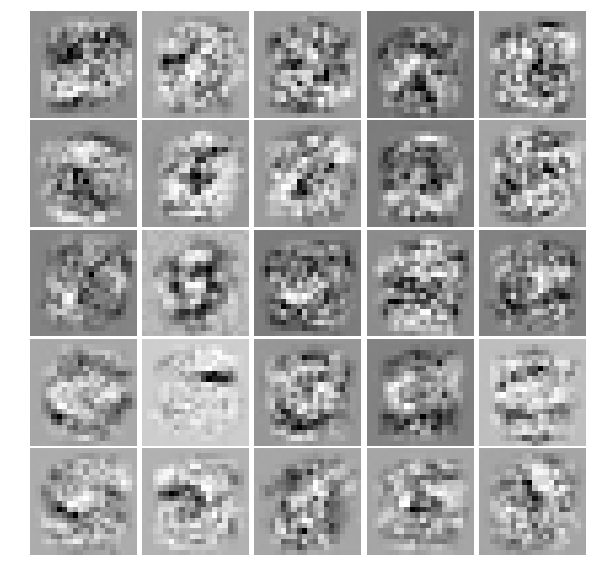

In [22]:
#Visualizing the hidden layer
#Lets visualize the weights Theta1 since the ith row of Theta1 contains a 401 dim vector

displayData(Theta1[:,1:])